# Proyek Analisis Data: Bike Sharing
- **Nama:** Muhammad Faqih
- **Email:** faqihtelco@gmail.com
- **ID Dicoding:** muhammad_faqih_kmwq

## Define Business Questions

- Pada musim apa penyewaan sepeda paling ramai?
- Berapa total penyewaan sepeda pada bulan Maret 2012?

## Import All Packages which Will be Used

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

ModuleNotFoundError: No module named 'pandas'

## Data Wrangling

### Gathering Data

In [168]:

drive.mount('/content/drive')

day = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')

day.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [169]:

hour = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')

hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Attributes:**
- **instant**: index
- **dteday**: bike rental date
- **season**: season (1:Spring, 2:Summer, 3:Fall, 4:Winter)
- **yr**: year (0: 2011, 1:2012)
- **mnth**: month (1 to 12)
- **hr**: hour (0 to 23)
- **holiday**: holiday
- **weekday**: day of the week
- **workingday**: weekday (1 if weekday, 0 if holiday)
- **weathersit**:
- 1: Sunny, Few clouds, Partly cloudy, Partly cloudy
- 2: Fog + Cloudy, Fog + Broken clouds, Fog + Few clouds, Fog
- 3: Light snow, Light rain + Thunderstorms + Scattered clouds, Light rain + Scattered clouds
- 4: Heavy rain + Ice + Thunderstorm + Fog, Snow + Fog
- **temp**: Temperature in Celsius
- **atemp**: Perceived temperature in Celsius.
- **hum**: Normalized humidity. The value is divided into 100 (max)
- **windspeed**: Normalized wind speed. The value is divided into 67 (max)
- **casual**: number of regular bike borrowers, who are not subscribed
- **registered**: number of bike borrowers who are registered members
- **cnt**: total number of bike borrowers (total bike borrowers both casual and registered)

### Assessing Data

In [170]:

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [171]:

day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [172]:

day.duplicated().sum()

0

No datas duplicated

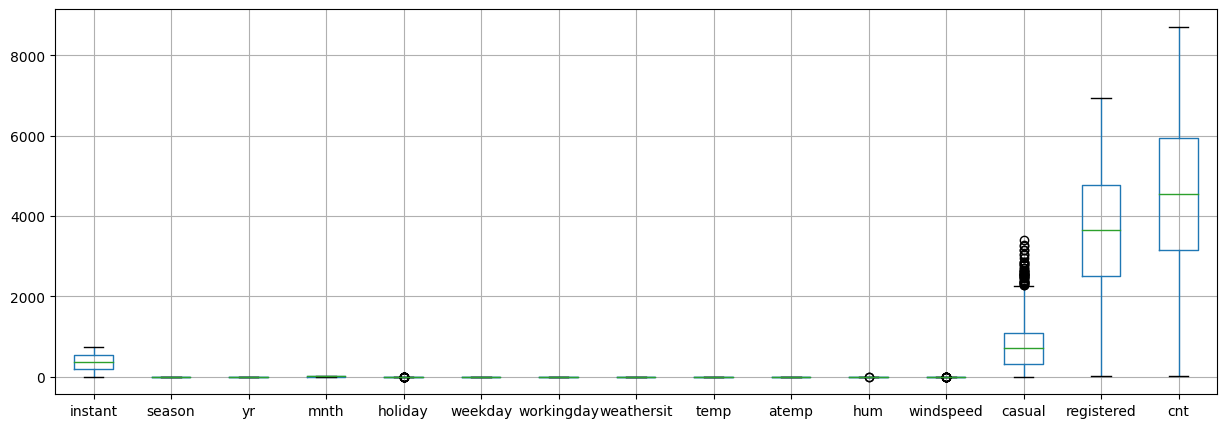

In [173]:

plt.figure(figsize=(15, 5))

day.boxplot()

plt.show()

In [174]:

day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

**Drop Outlier**

In [175]:

def remove_outliers(df):

    df_numeric = df.select_dtypes(include=['number'])

    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outliers per column
    mask = (df_numeric >= lower_bound) & (df_numeric <= upper_bound)
    df_filtered = df_numeric[mask.all(axis=1)]

    return df[df.index.isin(df_filtered.index)]

# Check data size before and after
print(f"Before deleting outlier: {day.shape}")

day_cleaned = remove_outliers(day)

print(f"After deleting outlier: {day_cleaned.shape}")


Sebelum menghapus outlier: (731, 16)
Setelah menghapus outlier: (655, 16)


In [176]:

missing_values = day.isnull().sum()
print("Amount missing values per column:\n", missing_values)

Jumlah missing values per kolom:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [177]:

day_cleaned = day.dropna()

In [178]:
print("Amount of duplication before deleting actions:", day_cleaned.duplicated().sum())
day_cleaned = day_cleaned.drop_duplicates()
print("Amount of duplication after deleting actions:", day_cleaned.duplicated().sum())

Jumlah duplikasi sebelum dihapus: 0
Jumlah duplikasi setelah dihapus: 0


**Change data types**

In [179]:

day['dteday'] = pd.to_datetime(day['dteday'])

## Exploratory Data Analysis (EDA)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


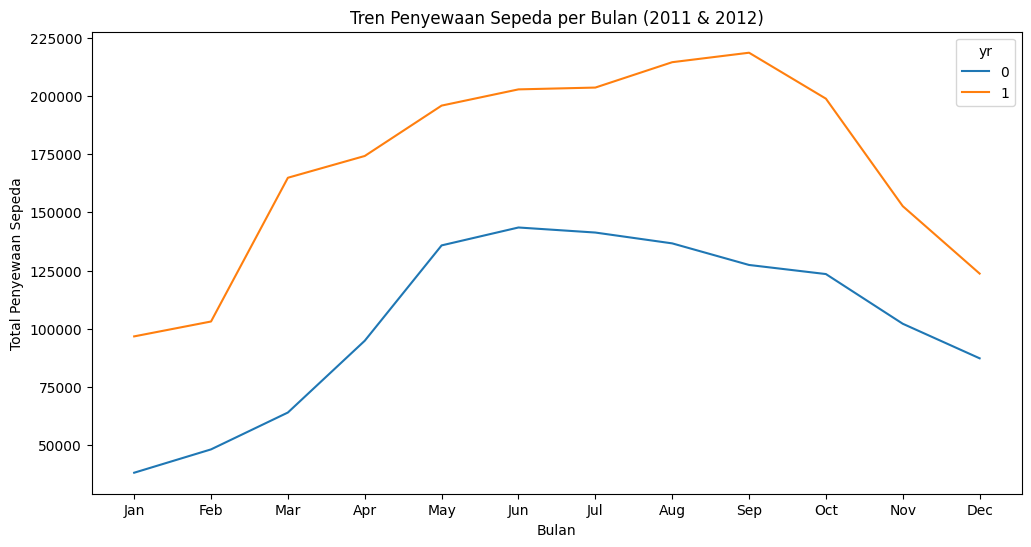

In [195]:

yearly_rental_trend = day.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=yearly_rental_trend)
plt.title('Bike Rental Trends per Month (2011 & 2012)')
plt.xlabel('Months')
plt.ylabel('Total Bike Rental')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

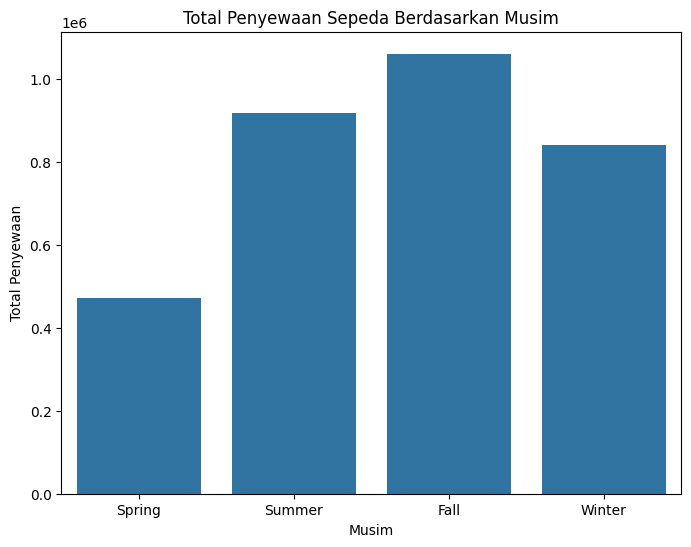

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64


In [182]:
season_counts = day.groupby('season')['cnt'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Total Bike Rentals By Season')
plt.xlabel('Season')
plt.ylabel('Rental Total')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

print(season_counts)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda paling ramai?

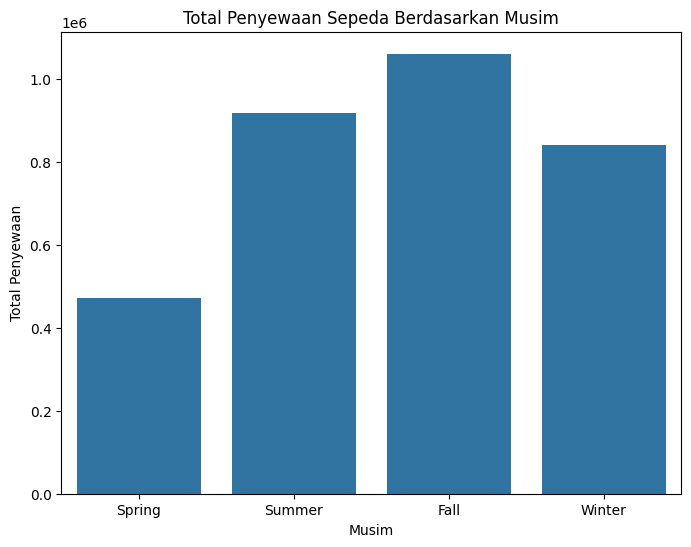

Musim dengan pinjaman sepeda paling ramai: 3


In [183]:

season_counts = day.groupby('season')['cnt'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Total Bike Rentals By Season')
plt.xlabel('Season')
plt.ylabel('Rental Total')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

ramai = season_counts.idxmax()
print("The season with the busiest bike loans:", ramai)

### Pertanyaan 2: Berapa total penyewaan sepeda pada bulan Maret 2012?

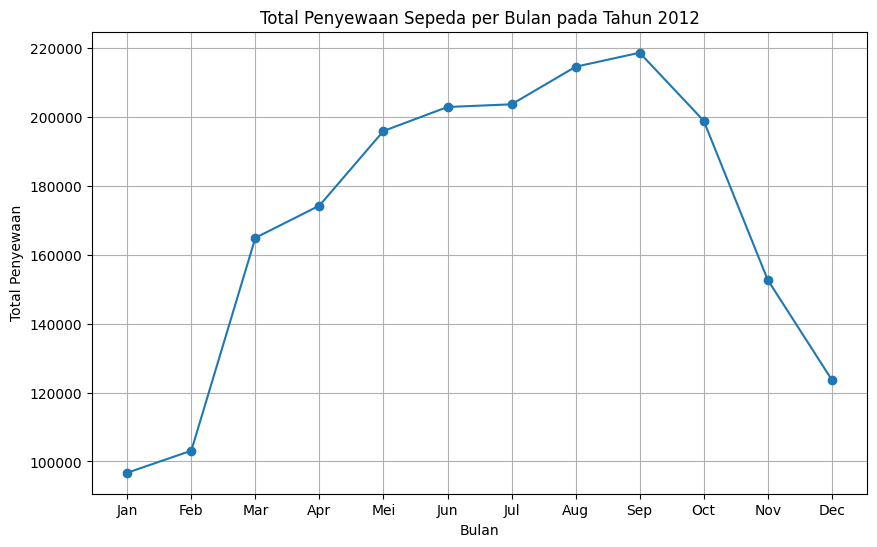

Total penyewaan sepeda pada bulan Maret 2012:  164875


In [196]:

day_2012 = day[day['yr'] == 1]

monthly_rental_2012 = day_2012.groupby('mnth')['cnt'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_rental_2012.index, monthly_rental_2012.values, marker='o')
plt.title('Total Bike Rentals per Month in 2012')
plt.xlabel('Months')
plt.ylabel('Rental Total')
plt.xticks(monthly_rental_2012.index, ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

total_rental_march_2012 = day_2012[day_2012['mnth'] == 3]['cnt'].sum()

print("Total bicycle rentals in March 2012: ",  total_rental_march_2012)


## Conclusion

- Question 1 : Musim dengan peminjaman sepeda paling ramai adalah musim gugur (Fall)
- Question 2 : Total penyewaan sepeda pada bulan Maret 2012:  164875